# <u>TASK-4 Global Prediction with time-series(GRAPH) of<u>
> [a]. Confirmed cases, \
> [b]. Deaths, \
> [c]. Recoveries,\
> [d]. All metrics should contain Normal Graph, Pie Chart and Bar Chart. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv') 
Deaths    = pd.read_csv('time_series_covid19_deaths_global.csv')
Recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

In [3]:
Confirmed = Confirmed.T
Deaths    = Deaths.T
Recovered = Recovered.T

Confirmed.fillna(0, inplace=True)
Deaths.fillna(0, inplace=True)
Recovered.fillna(0, inplace=True)

In [4]:
Confirmed = Confirmed.reset_index()
Deaths    = Deaths.reset_index()
Recovered = Recovered.reset_index()

Confirmed.columns = Confirmed.iloc[1]
Deaths.columns    = Deaths.iloc[1]
Recovered.columns = Recovered.iloc[1]

In [5]:
Confirmed = Confirmed.iloc[4:,:]
Deaths    = Deaths.iloc[4:,:]
Recovered = Recovered.iloc[4:,:]

Confirmed['Date'] = Confirmed['Country/Region']
Deaths['Date']    = Deaths['Country/Region']
Recovered['Date'] = Recovered['Country/Region']

del Confirmed['Country/Region']
del Deaths['Country/Region']
del Recovered['Country/Region']

In [6]:
Confirmed['Date'] = pd.to_datetime(Confirmed['Date'])
Deaths['Date']    = pd.to_datetime(Deaths['Date'])
Recovered['Date'] = pd.to_datetime(Recovered['Date'])

In [7]:
Confirmed = Confirmed.set_index('Date')
Deaths    = Deaths.set_index('Date')
Recovered = Recovered.set_index('Date')


Confirmed.index.freq = 'd'
Deaths.index.freq    = 'd'
Recovered.index.freq = 'd'

In [8]:
Confirmed = Confirmed.groupby(level=0, axis=1).sum()
Deaths    = Deaths.groupby(level=0, axis=1).sum()
Recovered = Recovered.groupby(level=0, axis=1).sum()

In [9]:
Confirmed['Daily_Cases'] = Confirmed.diff(1).sum(axis = 1)
Deaths['Daily_Cases']    = Deaths.diff(1).sum(axis = 1)
Recovered['Daily_Cases'] = Recovered.diff(1).sum(axis = 1)

In [10]:
Confirmed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174 entries, 2020-01-22 to 2020-07-13
Freq: D
Columns: 189 entries, Afghanistan to Daily_Cases
dtypes: float64(189)
memory usage: 258.3 KB


In [11]:
Confirmed['Total_Cases'] = Confirmed.iloc[:,:-1].sum(axis = 1)
Deaths['Total_Cases']    = Deaths.iloc[:,:-1].sum(axis = 1)
Recovered['Total_Cases'] = Recovered.iloc[:,:-1].sum(axis = 1)

## The Intresting Part ..In Daily data we can easily see the seasonality 

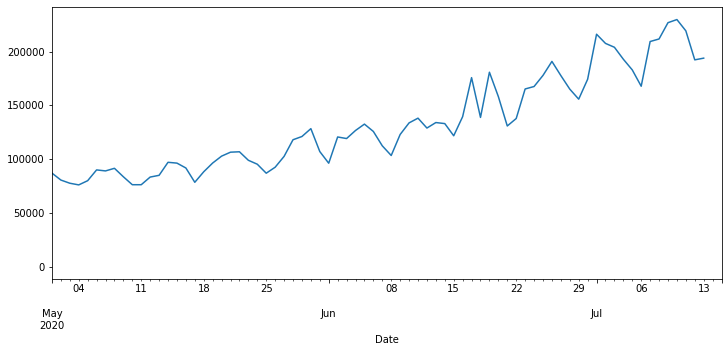

In [12]:
Confirmed['Daily_Cases'].plot(figsize = (12,5),xlim = ['2020-05-01','2020-07-15']);

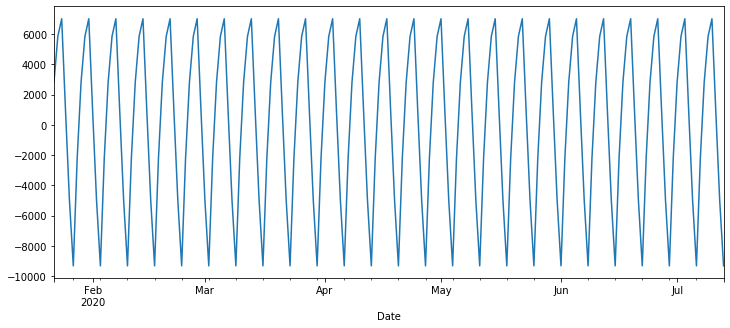

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(Confirmed['Daily_Cases'])

results.seasonal.plot(figsize = (12,5));
# PROVED SEASONALITY

In [14]:
print(Confirmed.shape)
print(Recovered.shape)
print(Deaths.shape)

(174, 190)
(174, 190)
(174, 190)


In [15]:
print(len(Confirmed))
print(len(Recovered))
print(len(Deaths))

174
174
174


# TASK [4.a]. Confirmed

In [16]:
# TRAIL/TEST SPLIT
train_data_conf = Confirmed.iloc[:150] # Goes up to but not including 
test_data_conf = Confirmed.iloc[150:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model_conf = ExponentialSmoothing(train_data_conf['Total_Cases'],trend='mul',seasonal='mul').fit()

predictions_C = fitted_model_conf.forecast(34).rename('Confirm_Pred')

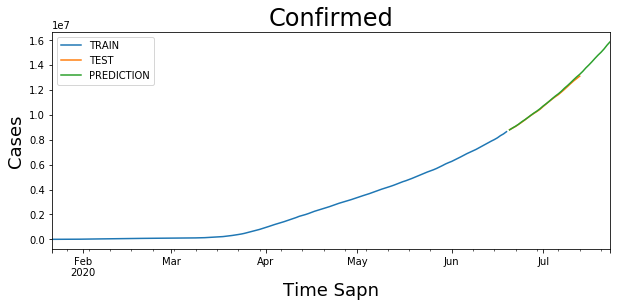

In [17]:
train_data_conf['Total_Cases'].plot(legend=True,label='TRAIN')
test_data_conf['Total_Cases'].plot(legend=True,label='TEST',figsize=(10,4))
predictions_C.plot(legend=True,label='PREDICTION');
plt.ylabel('Cases', size= 18)
plt.xlabel('Time Sapn', size= 18)
plt.title('Confirmed', size = 24)
plt.show()
# le7 = 10000000

# TASK [2.b]. Deaths

In [18]:
# TRAIL/TEST SPLIT
train_data_deaths = Deaths.iloc[:150] # Goes up to but not including 
test_data_deaths = Deaths.iloc[150:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model_deaths = ExponentialSmoothing(train_data_deaths['Total_Cases'],trend='add',seasonal='mul').fit()

predictions_D = fitted_model_deaths.forecast(34).rename('Deaths_Pred')

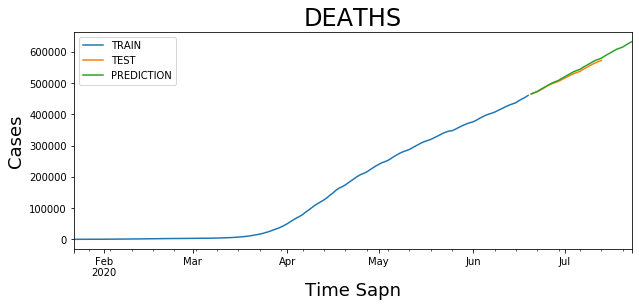

In [19]:
train_data_deaths['Total_Cases'].plot(legend=True,label='TRAIN')
test_data_deaths['Total_Cases'].plot(legend=True,label='TEST',figsize=(10,4))
predictions_D.plot(legend=True,label='PREDICTION');
plt.ylabel('Cases', size= 18)
plt.xlabel('Time Sapn', size= 18)
plt.title('DEATHS', size = 24)
plt.show()

# TASK [3.c]. Recovered

In [20]:
# TRAIL/TEST SPLIT
train_data_rec = Recovered.iloc[:150] # Goes up to but not including 
test_data_rec = Recovered.iloc[150:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model_rec = ExponentialSmoothing(train_data_rec['Total_Cases'],trend='mul',seasonal='mul').fit()

predictions_R = fitted_model_rec.forecast(34).rename('Recovery_Pred')

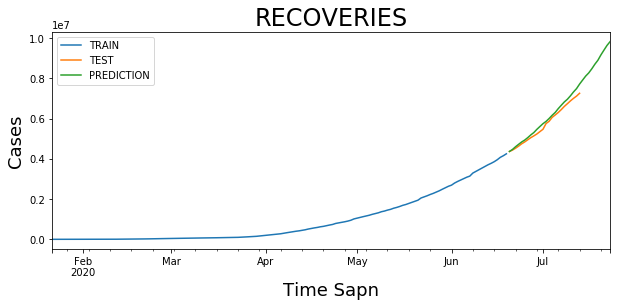

In [21]:
train_data_rec['Total_Cases'].plot(legend=True,label='TRAIN')
test_data_rec['Total_Cases'].plot(legend=True,label='TEST',figsize=(10,4))
predictions_R.plot(legend=True,label='PREDICTION');
plt.ylabel('Cases', size= 18)
plt.xlabel('Time Sapn', size= 18)
plt.title('RECOVERIES', size = 24)
plt.show()
# le7 = 10000000

# TASK [4.d].  NEXT 10 DAY'S PREDICTED Normal Graph, Pie Chart & Bar chart

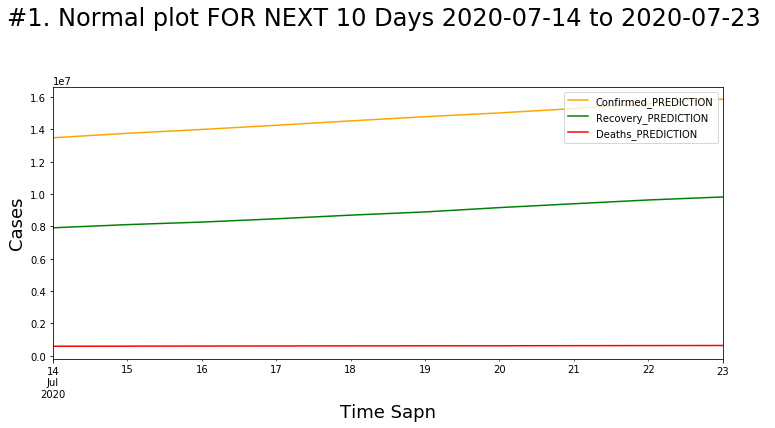

In [22]:
predictions_C.iloc[-10:].plot(legend=True, label='Confirmed_PREDICTION', color = 'orange')
predictions_R.iloc[-10:].plot(legend=True, label='Recovery_PREDICTION',color = 'green', figsize =(12,5))
predictions_D.iloc[-10:].plot(legend=True, label='Deaths_PREDICTION', color = 'red')
plt.ylabel('Cases', size= 18)
plt.xlabel('Time Sapn', size= 18)
plt.title('#1. Normal plot FOR NEXT 10 Days 2020-07-14 to 2020-07-23 \n\n', size = 24)
plt.show()
# le7 = 10000000

Predicted CONFIRMED cases for 2020-07-14 to 2020-07-23 =  146632439
Predicted DEATHS cases for 2020-07-14 to 2020-07-23    =  88397756
Predicted RECOVERED cases for 2020-07-14 to 2020-07-23 =  6099031
Predicted ACTIVE cases for 2020-07-14 to 2020-07-23    =  52135652


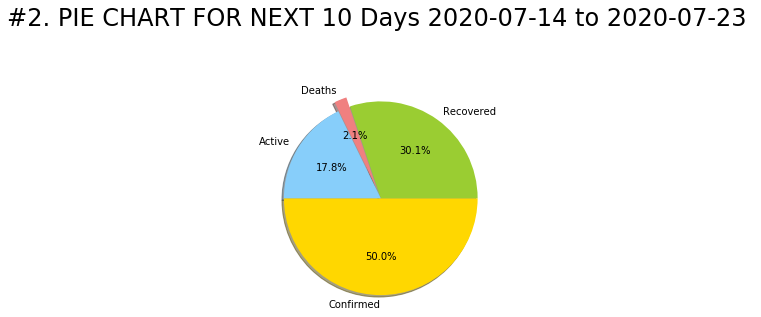

In [23]:
# Data to plot on pichart For next 15 Days 13-07-2020 to 2020-07-24
labels = 'Confirmed', 'Recovered', 'Deaths', 'Active'
C = predictions_C.iloc[-10:].sum()
R = predictions_R.iloc[-10:].sum()
D = predictions_D.iloc[-10:].sum()
A = (C-(R+D))
sizes = [C, R, D, A]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title('#2. PIE CHART FOR NEXT 10 Days 2020-07-14 to 2020-07-23 \n\n', size = 24)
print('Predicted CONFIRMED cases for 2020-07-14 to 2020-07-23 = ', str(int(C)))
print('Predicted DEATHS cases for 2020-07-14 to 2020-07-23    = ', str(int(R)))
print('Predicted RECOVERED cases for 2020-07-14 to 2020-07-23 = ', str(int(D)))
print('Predicted ACTIVE cases for 2020-07-14 to 2020-07-23    = ', str(int(A)))
plt.show()

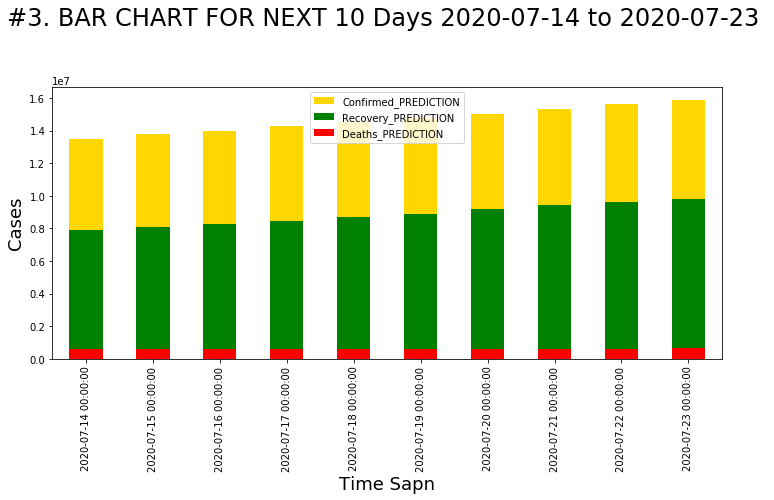

In [24]:
predictions_C.iloc[-10:].plot.bar(legend=True, label='Confirmed_PREDICTION', color = 'gold')
predictions_R.iloc[-10:].plot.bar(legend=True, label='Recovery_PREDICTION',color = 'green' , figsize =(12,5))
predictions_D.iloc[-10:].plot.bar(legend=True, label='Deaths_PREDICTION', color = 'red')
plt.ylabel('Cases', size= 18)
plt.xlabel('Time Sapn', size= 18)
plt.title('#3. BAR CHART FOR NEXT 10 Days 2020-07-14 to 2020-07-23 \n\n', size = 24)
plt.show()
# le7 = 10000000